## ** problem staement **
      Analyze Meeshoo 2014‚Äì2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

In [19]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
sheets = pd.read_excel("/content/Regional Sales Dataset.xlsx",sheet_name = None )

In [21]:
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

In [22]:
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 12)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (49, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


In [23]:
df_sales.head()

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6      2499.1     14994.6         1824.343  
1              11      2351.7     25868.7         1269.918  
2               6       978.2      5869.2          684.740  
3               7      2338.3     16368.1         1028.852  
4               8      2291.4     18331.2         1260.270

In [24]:
df_customers.head(5)

Customer Index Customer Names
0               1  Geiss Company
1               2  Jaxbean Group
2               3     Ascend Ltd
3               4      Eire Corp
4               5   Blogtags Ltd

In [25]:
df_regions.head(5)


id        name                                   county state_code  \
0   1      Auburn                               Lee County         AL   
1   2  Birmingham           Shelby County/Jefferson County         AL   
2   3     Decatur           Limestone County/Morgan County         AL   
3   4      Dothan  Dale County/Houston County/Henry County         AL   
4   5      Hoover           Shelby County/Jefferson County         AL   

     state  type  latitude  longitude  area_code  population  households  \
0  Alabama  City  32.60986  -85.48078        334       62059       21767   
1  Alabama  City  33.52744  -86.79905        205      212461       89972   
2  Alabama  City  34.57332  -86.99214        256       55437       22294   
3  Alabama  City  31.23370  -85.40682        334       68567       25913   
4  Alabama  City  33.37695  -86.80558        205       84848       32789   

   median_income  land_area  water_area        time_zone  
0          38342  152375113     2646161  America/Chicago  
1          31061  378353942     6591013  America/Chicago  
2          41496  141006257    17594716  America/Chicago  
3          42426  232166237      835468  America/Chicago  
4          77146  122016784     2553332  America/Chicago

In [26]:
df_products.head(5)

Index Product Name
0      1    Product 1
1      2    Product 2
2      3    Product 3
3      4    Product 4
4      5    Product 5

In [27]:
df_state_reg.head(5)

Column1     Column2 Column3
0  State Code       State  Region
1          AL     Alabama   South
2          AR    Arkansas   South
3          AZ     Arizona    West
4          CA  California    West

In [28]:
new_header        = df_state_reg.iloc[0]      # grab the first row
df_state_reg.columns = new_header             # set columns
df_state_reg       = df_state_reg[1:].reset_index(drop=True)  # drop header row and reset

In [29]:
df_state_reg.head(5)

0 State Code       State Region
0         AL     Alabama  South
1         AR    Arkansas  South
2         AZ     Arizona   West
3         CA  California   West
4         CO    Colorado   West

In [30]:
df_budgets.head(5)

Product Name  2017 Budgets
0    Product 1   3016489.209
1    Product 2   3050087.565
2    Product 3   2642352.432
3    Product 4   2885560.824
4    Product 5   3925424.542

In [31]:

df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [32]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [33]:
 df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [34]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [35]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [36]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

#### ** Data cleaning and Wrangling**


In [37]:
# merge with customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)


In [38]:
df.head(5)

OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  Customer Index  \
0               6      2499.1     14994.6         1824.343             126   
1              11      2351.7     25868.7         1269.918              96   
2               6       978.2      5869.2          684.740               8   
3               7      2338.3     16368.1         1028.852              42   
4               8      2291.4     18331.2         1260.270              73   

     Customer Names  
0     Rhynoodle Ltd  
1    Thoughtmix Ltd  
2   Amerisourc Corp  
3  Colgate-Pa Group  
4     Deseret Group

In [39]:
#  Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [40]:
#  Merge with Regions
df = df.merge(
    df_regions.drop(columns=['state'], errors='ignore'), # Drop the 'state' column from df_regions
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [64]:
#  Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

df.head(5)

In [65]:
df.to_csv('file.csv')

In [103]:
# cleanup up reductant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code', 'state'
    # add any auto-generated cols you don't need
]
df = df.drop(columns=cols_to_drop, errors='ignore')
df.head(5)

order_number order_date     customer_name      channel product_name  \
0   SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   

   quantity  unit_price  revenue      cost state_name  ...       lat  \
0         6      2499.1  14994.6  1824.343         GA  ...  32.08354   
1        11      2351.7  25868.7  1269.918         IN  ...  39.61366   
2         6       978.2   5869.2   684.740         CA  ...  37.66243   
3         7      2338.3  16368.1  1028.852         IN  ...  39.16533   
4         8      2291.4  18331.2  1260.270         CT  ...  41.77524   

         lon  budget  total_cost     profit  profit_margin_per  order_month  \
0  -81.09983     NaN   10946.058   4048.542               27.0      2014-01   
1  -86.10665     NaN   13969.098  11899.602               46.0      2014-01   
2 -121.87468     NaN    4108.440   1760.760               30.0      2014-01   
3  -86.52639     NaN    7201.964   9166.136               56.0      2014-01   
4  -72.52443     NaN   10082.160   8249.040               45.0      2014-01   

   order_month_name order_month_num profit_margin_pct  
0           January               1              27.0  
1           January               1              46.0  
2           January               1              30.0  
3           January               1              56.0  
4           January               1              45.0  

[5 rows x 22 columns]

In [45]:
# Convert all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region'],
      dtype=object)

In [67]:
df = df.merge(
    df_budgets,
    how='left',
    left_on='product name',
    right_on='Product Name',
)

In [71]:
df.columns =df.columns.str.lower()
df.columns.values

array(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'quantity', 'unit_price', 'revenue', 'cost',
       'state_name', 'state_name', 'us_region', 'lat', 'lon', 'budget'],
      dtype=object)

In [68]:
#  List only the columns you want to KEEP
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty √ó unit_price)
    'total unit cost',    # company‚Äôs cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]
df = df[cols_to_keep]



In [113]:
#  Rename
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'channel'          : 'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # company‚Äôs cost for the line item
    'state_code'       : 'state', # two-letter state code for delivery location (from df_regions)          : 'delivery_state_name',     # full state name for delivery location (from df_regions, after merge with df_state_reg)
    'State'            : 'state_name',       # full state name from state_reg merge
    'Region'           : 'us_region',      # broader U.S. region from state_reg merge
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 Budgets_budgets'     : 'budget'          # 2017 budget target (float)
})

df.head()

order_number order_date     customer_name      channel product_name  \
0   SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   

   quantity  unit_price  revenue      cost state_name  ...       lat  \
0         6      2499.1  14994.6  1824.343         GA  ...  32.08354   
1        11      2351.7  25868.7  1269.918         IN  ...  39.61366   
2         6       978.2   5869.2   684.740         CA  ...  37.66243   
3         7      2338.3  16368.1  1028.852         IN  ...  39.16533   
4         8      2291.4  18331.2  1260.270         CT  ...  41.77524   

         lon  budget  total_cost     profit  profit_margin_per  order_month  \
0  -81.09983     NaN   10946.058   4048.542               27.0      2014-01   
1  -86.10665     NaN   13969.098  11899.602               46.0      2014-01   
2 -121.87468     NaN    4108.440   1760.760               30.0      2014-01   
3  -86.52639     NaN    7201.964   9166.136               56.0      2014-01   
4  -72.52443     NaN   10082.160   8249.040               45.0      2014-01   

   order_month_name order_month_num profit_margin_pct  
0           January               1              27.0  
1           January               1              46.0  
2           January               1              30.0  
3           January               1              56.0  
4           January               1              45.0  

[5 rows x 22 columns]

In [72]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
df[['order_date','product_name','revenue','budget']].head(60000)

order_date product_name  revenue       budget
0     2014-01-01   Product 27  14994.6          NaN
1     2014-01-01   Product 20  25868.7          NaN
2     2014-01-01   Product 26   5869.2          NaN
3     2014-01-01    Product 7  16368.1          NaN
4     2014-01-01    Product 8  18331.2          NaN
...          ...          ...      ...          ...
59995 2017-11-23   Product 26   2291.4  5685138.270
59996 2017-11-23   Product 17  11175.6  2119616.824
59997 2017-11-23   Product 20  14405.0  2067108.120
59998 2017-11-23   Product 30  12381.6  1011609.684
59999 2017-11-23    Product 8  10492.2  1085037.329

[60000 rows x 4 columns]

In [73]:
df.to_csv('final.csv')

In [74]:
df.isnull().sum()

order_number         0
order_date           0
customer_name        0
channel              0
product_name         0
quantity             0
unit_price           0
revenue              0
cost                 0
state_name           0
state_name           0
us_region            0
lat                  0
lon                  0
budget           48841
dtype: int64

#### Feature engineering

In [75]:
df.head(5)

order_number order_date     customer_name      channel product_name  \
0   SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   

   quantity  unit_price  revenue      cost state_name   state_name  us_region  \
0         6      2499.1  14994.6  1824.343         GA      Georgia      South   
1        11      2351.7  25868.7  1269.918         IN      Indiana    Midwest   
2         6       978.2   5869.2   684.740         CA   California       West   
3         7      2338.3  16368.1  1028.852         IN      Indiana    Midwest   
4         8      2291.4  18331.2  1260.270         CT  Connecticut  Northeast   

        lat        lon  budget  
0  32.08354  -81.09983     NaN  
1  39.61366  -86.10665     NaN  
2  37.66243 -121.87468     NaN  
3  39.16533  -86.52639     NaN  
4  41.77524  -72.52443     NaN

In [76]:
df['total_cost'] = df['quantity'] * df['cost']

In [77]:
df['profit'] = df['revenue'] - df['total_cost']

In [78]:
df['profit_margin_per'] = (df['profit'] / df['revenue']) * 100

In [86]:
# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1‚Äì12)
df['order_month_num'] = df['order_date'].dt.month


In [87]:
df.head(5)

order_number order_date     customer_name      channel product_name  \
0   SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   

   quantity  unit_price  revenue      cost state_name  ...  us_region  \
0         6      2499.1  14994.6  1824.343         GA  ...      South   
1        11      2351.7  25868.7  1269.918         IN  ...    Midwest   
2         6       978.2   5869.2   684.740         CA  ...       West   
3         7      2338.3  16368.1  1028.852         IN  ...    Midwest   
4         8      2291.4  18331.2  1260.270         CT  ...  Northeast   

        lat        lon  budget  total_cost     profit  profit_margin_per  \
0  32.08354  -81.09983     NaN   10946.058   4048.542               27.0   
1  39.61366  -86.10665     NaN   13969.098  11899.602               46.0   
2  37.66243 -121.87468     NaN    4108.440   1760.760               30.0   
3  39.16533  -86.52639     NaN    7201.964   9166.136               56.0   
4  41.77524  -72.52443     NaN   10082.160   8249.040               45.0   

   order_month order_month_name order_month_num  
0      2014-01          January               1  
1      2014-01          January               1  
2      2014-01          January               1  
3      2014-01          January               1  
4      2014-01          January               1  

[5 rows x 21 columns]

  #### EDA
  

#### **Monthly sales trend over time**

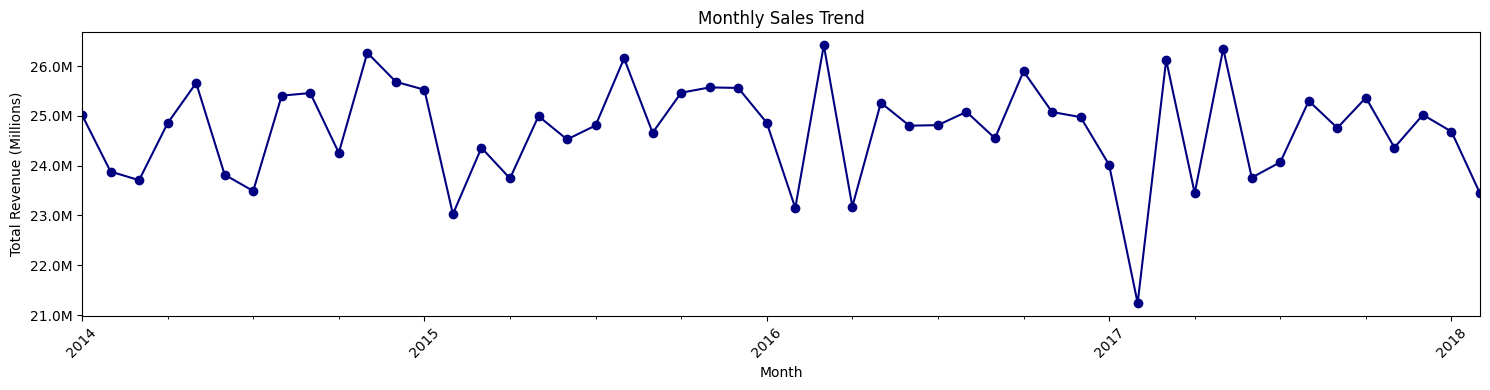

In [83]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


Sales consistently cycle between 24 -
26 M.a sharp drop comes around year 2017


 #### **2. Monthly Sales Trend (All Years Combined)**

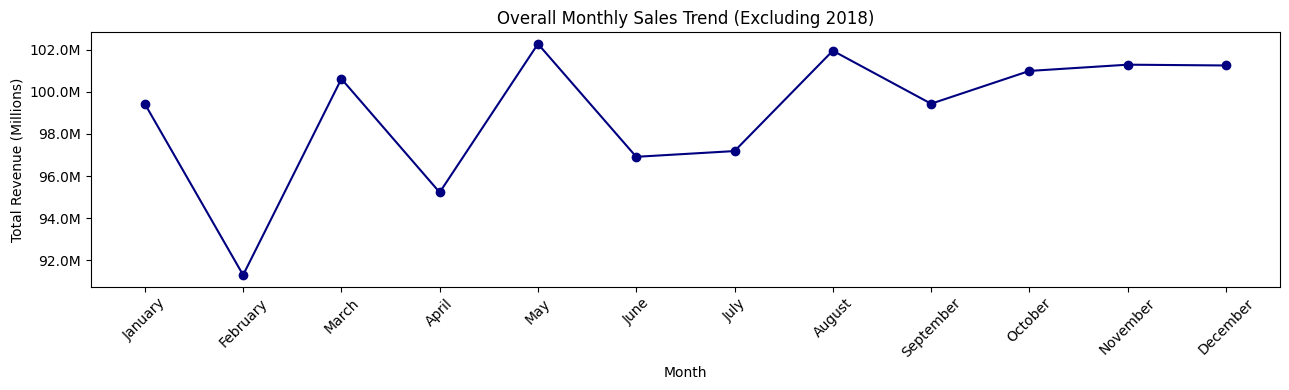

In [88]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren‚Äôt skewed by an incomplete year.
                                            #I create df_ so I don‚Äôt alter the original df, preserving it intact for other analyses while filtering just for this chart.


# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()

# 8. Display the plot
plt.show()

Highest sales in May aroun 102M and lowest in Feb aound 91M.

#### **Top 10 producvts by revenue**

/tmp/ipython-input-2376400503.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


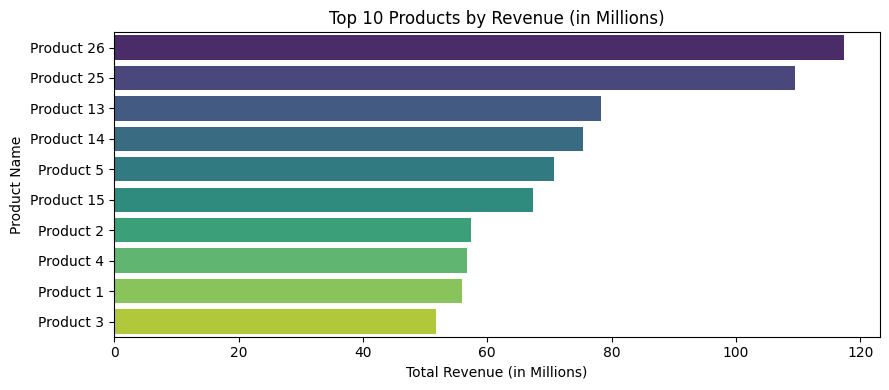

In [93]:
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

Products 26 and 25 pull away at 118M and
110 M, with a sharp drop to 78M for product 13 and a mid
68‚Äì$75 M bracket.

The bottom four cluster at
57 M, highlighting similar constraints.

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.

#### **Top 10 Products by Avg Profit Margin**

/tmp/ipython-input-1714083238.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


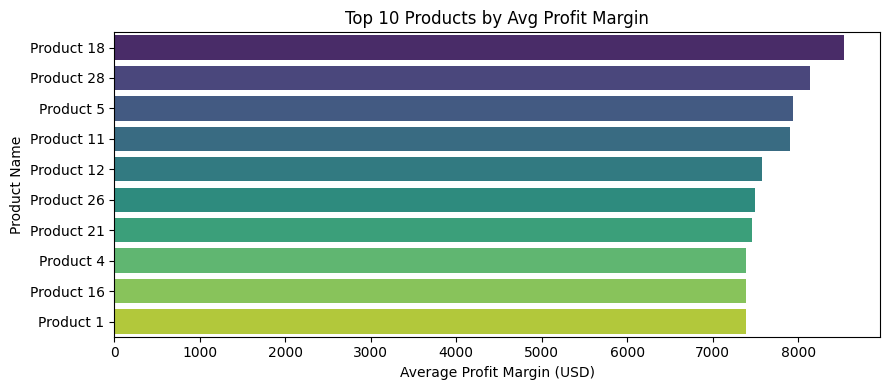

In [94]:
# 1Ô∏è‚É£ Compute average profit per product and take the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2Ô∏è‚É£ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3Ô∏è‚É£ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# 4Ô∏è‚É£ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5Ô∏è‚É£ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

Product 18 and 28 leads with average proifit margin 8.5k -8k .following by product 5 and 11 with 7.9-7.8k.


 #### **Sales by Channel (Pie Chart)**

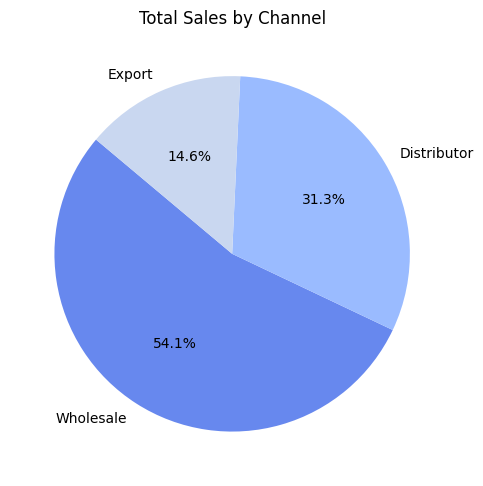

In [95]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

#### **Average Order Value (AOV) Distribution**

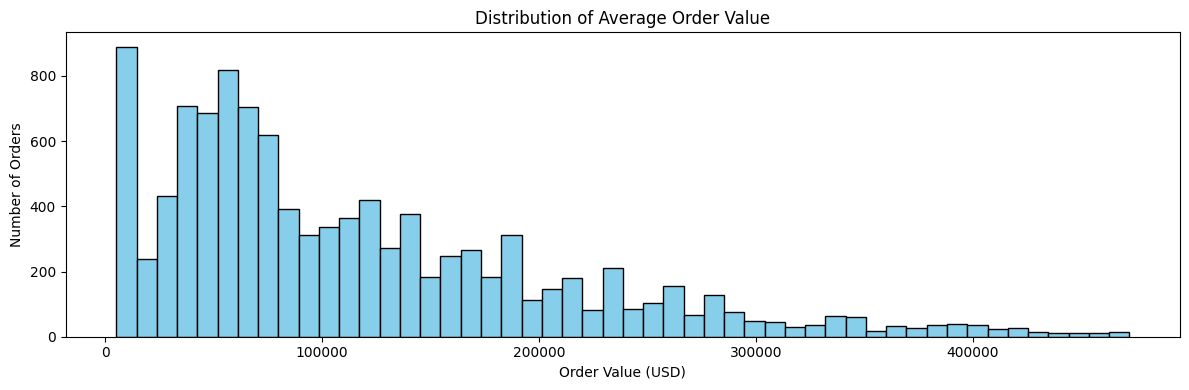

In [96]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

The order‚Äêvalue distribution is heavily right‚Äêskewed, with most orders clustering between
120 K and a pronounced mode around 50-
60 K.

A long tail of high-value transactions extends up toward 400k-500 K, but these large orders represent only a small share of total volume



#### **Profit Margin % vs. Unit Price**

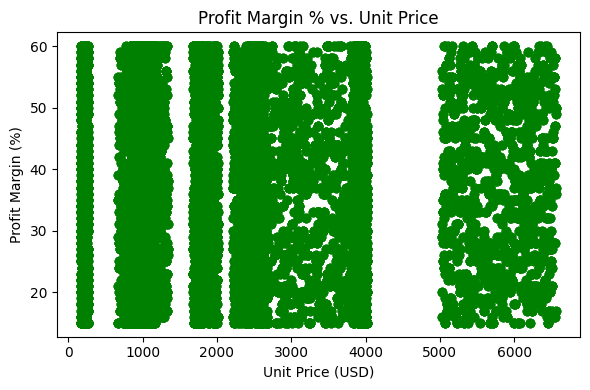

In [97]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()



Profit margin (%) seems to stay within a band (15%‚Äì60%), regardless of unit price.

This suggests that profit margin is relatively stable, even if the unit price is very high or low.

You see vertical "bands" of dots at specific unit price ranges (e.g., ~0‚Äì1000, ~1000‚Äì2000, ~3000‚Äì4000, ~5000‚Äì6000).

This indicates that products are priced in tiers, not continuously spread

#### **Unit Price Distribution per Product**

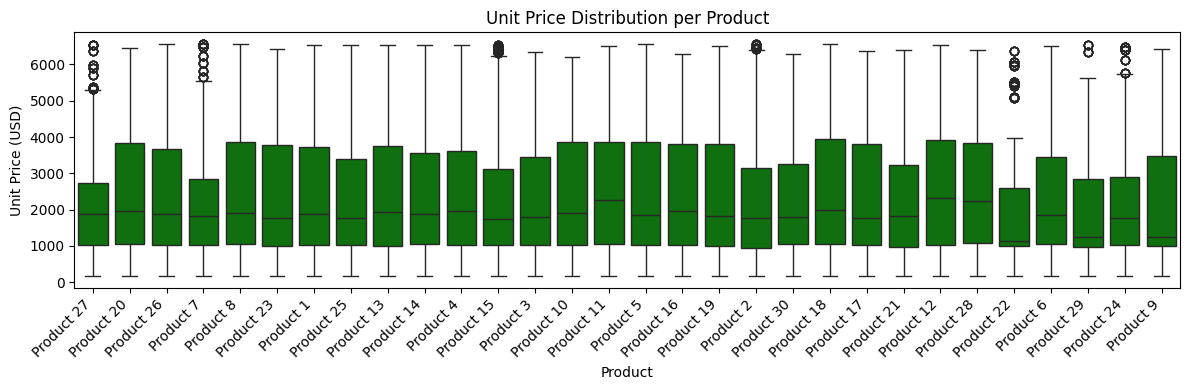

In [98]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

Products 8, 17, 27, 20, and 28 show high-end revenue spikes‚Äîwell above their upper whiskers‚Äîlikely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

##### **Total Sales by US Region**

/tmp/ipython-input-762682233.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


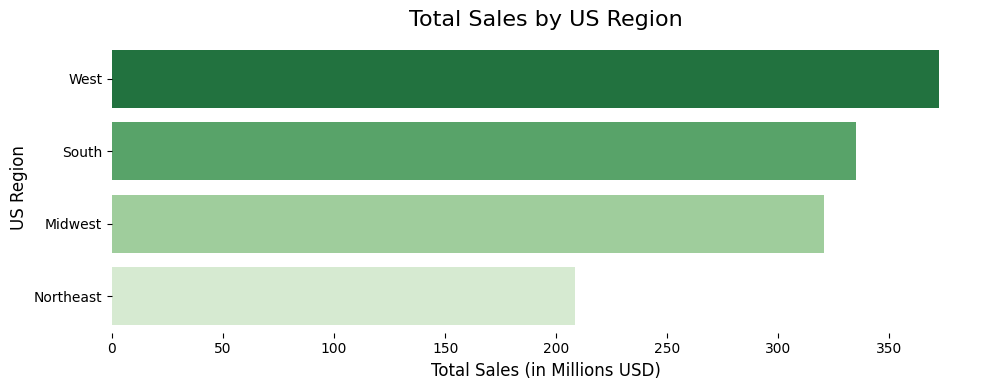

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top‚Üíbottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark‚Üílight green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


#### **Top and Bottom 10 Customers by Revenue**





/tmp/ipython-input-1452768722.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1452768722.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


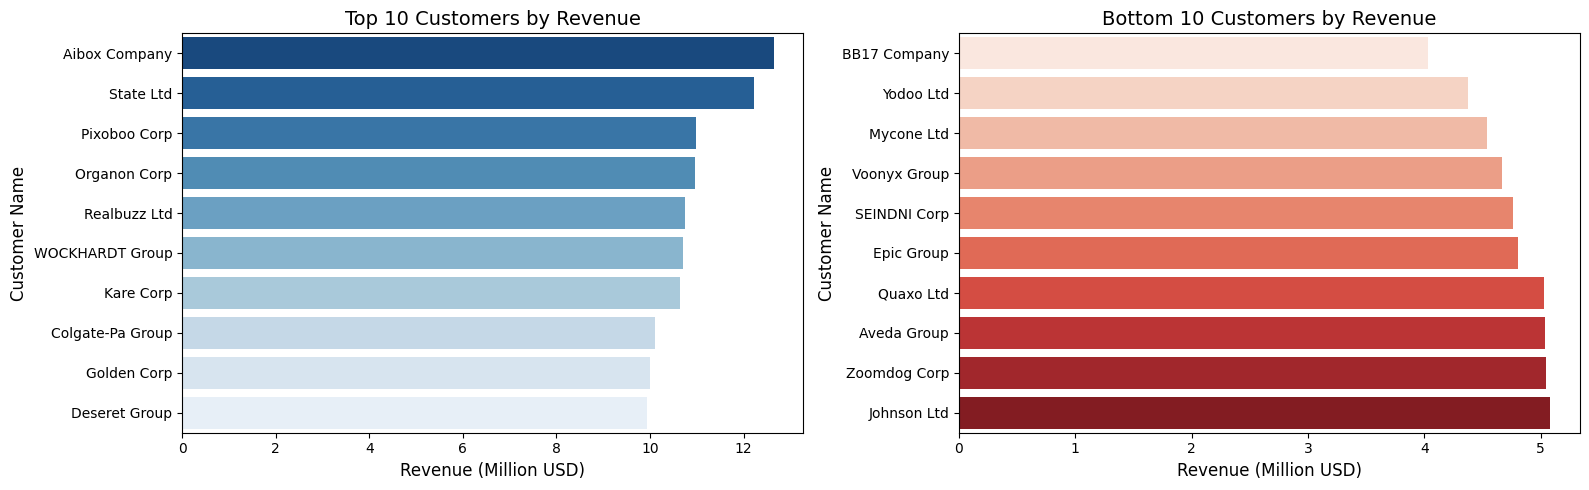

In [105]:
# üîù Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# üîª Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

#### **Customer Segmentation: Revenue vs. Profit Margin**



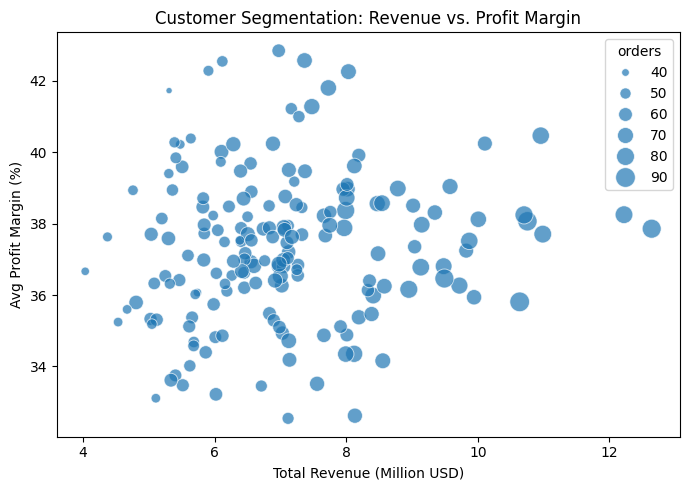

In [115]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()



Customers with >$10 M in revenue tend to sustain margins between 36‚Äì40%, indicating that scale does not significantly erode profitability.

Most customers cluster within the $6‚Äì10 M range and show stable margins (~34‚Äì40%), suggesting consistent pricing in this tier.

#### **Correlation Heatmap of Numeric Features**

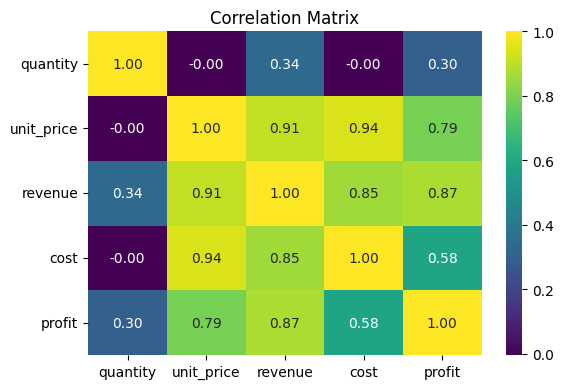

In [116]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

**Profit and revenue** are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.

**Unit price** is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost‚Äîhighlighting how pricing decisions ripple through both top‚Äëline and expense figures.

**Cost shows** a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.

**Quantity** has virtually no correlation with unit price or cost (‚âà0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

In [117]:
df

order_number order_date     customer_name      channel product_name  \
0       SO - 000225 2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1      SO - 0003378 2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2      SO - 0005126 2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3      SO - 0005614 2014-01-01  Colgate-Pa Group       Export    Product 7   
4      SO - 0005781 2014-01-01     Deseret Group    Wholesale    Product 8   
...             ...        ...               ...          ...          ...   
64099  SO - 0007573 2018-02-28   Dazzlesphe Corp    Wholesale   Product 26   
64100  SO - 0007706 2018-02-28        Yombu Corp       Export   Product 21   
64101  SO - 0007718 2018-02-28        Bath Group  Distributor   Product 13   
64102  SO - 0008084 2018-02-28     Linklinks Ltd  Distributor   Product 20   
64103  SO - 0008654 2018-02-28       SAFEWAY Ltd  Distributor   Product 15   

       quantity  unit_price  revenue      cost state_name  ...       lat  \
0             6      2499.1  14994.6  1824.343         GA  ...  32.08354   
1            11      2351.7  25868.7  1269.918         IN  ...  39.61366   
2             6       978.2   5869.2   684.740         CA  ...  37.66243   
3             7      2338.3  16368.1  1028.852         IN  ...  39.16533   
4             8      2291.4  18331.2  1260.270         CT  ...  41.77524   
...         ...         ...      ...       ...        ...  ...       ...   
64099        12      1815.7  21788.4   980.478         PA  ...  40.15511   
64100         6       864.3   5185.8   579.081         IL  ...  42.11030   
64101        11      3953.0  43483.0  2648.510         FL  ...  26.24453   
64102         7      3959.7  27717.9  2930.178         NY  ...  42.91002   
64103         8       998.3   7986.4   848.555         OR  ...  45.48706   

             lon  budget  total_cost     profit  profit_margin_per  \
0      -81.09983     NaN   10946.058   4048.542               27.0   
1      -86.10665     NaN   13969.098  11899.602               46.0   
2     -121.87468     NaN    4108.440   1760.760               30.0   
3      -86.52639     NaN    7201.964   9166.136               56.0   
4      -72.52443     NaN   10082.160   8249.040               45.0   
...          ...     ...         ...        ...                ...   
64099  -74.82877     NaN   11765.736  10022.664               46.0   
64100  -88.03424     NaN    3474.486   1711.314               33.0   
64101  -80.20644     NaN   29133.610  14349.390               33.0   
64102  -78.74182     NaN   20511.246   7206.654               26.0   
64103 -122.80371     NaN    6788.440   1197.960               15.0   

       order_month  order_month_name order_month_num profit_margin_pct  
0          2014-01           January               1              27.0  
1          2014-01           January               1              46.0  
2          2014-01           January               1              30.0  
3          2014-01           January               1              56.0  
4          2014-01           January               1              45.0  
...            ...               ...             ...               ...  
64099      2018-02          February               2              46.0  
64100      2018-02          February               2              33.0  
64101      2018-02          February               2              33.0  
64102      2018-02          February               2              26.0  
64103      2018-02          February               2              15.0  

[64104 rows x 22 columns]

In [118]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)